In [19]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()


In [20]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)


(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [21]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]


In [22]:
'''
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1),
                        kernel_size=(3, 3), padding='same',
                        filters=32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same',
                        filters=64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same',
                        filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
'''

"\nmodel = keras.models.Sequential([\n    keras.layers.Conv2D(input_shape=(28, 28, 1),\n                        kernel_size=(3, 3), padding='same',\n                        filters=32),\n    keras.layers.MaxPooling2D((2, 2), strides=2),\n    keras.layers.Conv2D(kernel_size=(3, 3), padding='same',\n                        filters=64),\n    keras.layers.MaxPooling2D((2, 2), strides=2),\n    keras.layers.Conv2D(kernel_size=(3, 3), padding='same',\n                        filters=32),\n    keras.layers.Flatten(),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(32, activation='relu'),\n    keras.layers.Dense(10, activation='softmax'),\n])\n"

In [24]:
from tensorflow.keras import models, layers
model = models.Sequential()

In [25]:
# 1st Conv2d
#  - filter_cnt : 32 - kerner_size : (3,3) - relu
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
# 1st max pooling
# - pool_size = (2,2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# 2nd Conv2d
#  - filter_cnt : 64 - kerner_size : (3,3) - relu
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3),
                        activation='relu'))
# 2nd max pooling
# - pool_size = (2,2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# 3rd Conv2d
#  - filter_cnt : 64 - kerner_size : (3,3) - relu
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3),
                        activation='relu'))
# Flatten
model.add(layers.Flatten())

#classification module
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))


In [26]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels,
                    epochs=5, validation_split=0.25)


Epoch 1/5
1407/1407 [==============================] - 37s 26ms/step - loss: 0.5500 - accuracy: 0.8106 - val_loss: 0.4084 - val_accuracy: 0.8472
Epoch 2/5
1407/1407 [==============================] - 38s 27ms/step - loss: 0.3522 - accuracy: 0.8737 - val_loss: 0.3407 - val_accuracy: 0.8775
Epoch 3/5
1407/1407 [==============================] - 35s 25ms/step - loss: 0.3079 - accuracy: 0.8861 - val_loss: 0.3294 - val_accuracy: 0.8809
Epoch 4/5
1407/1407 [==============================] - 31s 22ms/step - loss: 0.2829 - accuracy: 0.8956 - val_loss: 0.3134 - val_accuracy: 0.8859
Epoch 5/5
1407/1407 [==============================] - 30s 21ms/step - loss: 0.2637 - accuracy: 0.9016 - val_loss: 0.3533 - val_accuracy: 0.8793


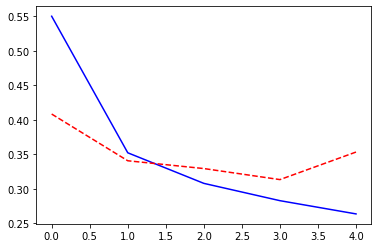

In [28]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')


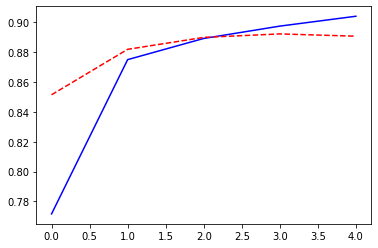

In [ ]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')


In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)


313/313 - 2s - loss: 0.3710 - accuracy: 0.8723 - 2s/epoch - 6ms/step
테스트 정확도: 0.8723000288009644


In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [31]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)


[8 5 0 9 4 3 4 4 5 1 0 1 2 6 6 9 6 1 5 1 1 1 9 3 4]


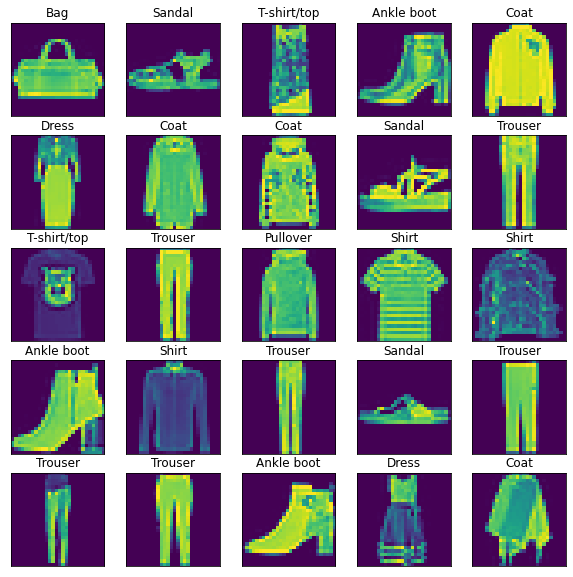

In [32]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                        figsize=(images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images:
          break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(28, 28)
         if n_rows > 1:
          axis = ax[i, j]
         else:
          axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = class_names[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, interpolation='nearest')


plot_images(images, predictions, images_per_row=5)


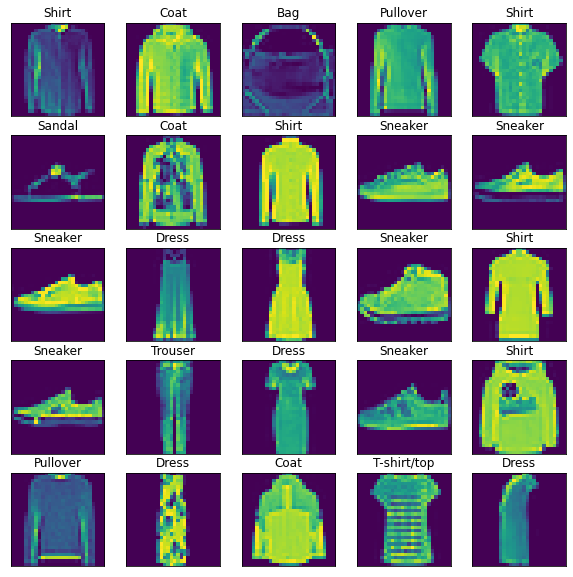

In [33]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row=5)
